`Experiment - 4` <br>
`01.02.24` <br>
`Linear Discriminant Analysis(LDA) Algorithm Implementation ` <br>

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
# Data
X1 = [(4, 2), (2, 4), (2, 3), (3, 6), (4, 4)]
X2 = [(9, 10), (6, 8), (9, 5), (8, 7), (10, 8)]

In [43]:
# Unzip data for plotting
x1_values, y1_values = zip(*X1)
x2_values, y2_values = zip(*X2)

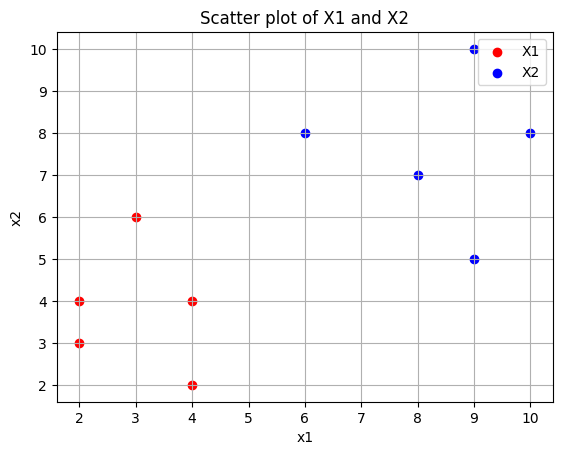

In [44]:
# Plot
plt.scatter(x1_values, y1_values, color='red', label='X1')
plt.scatter(x2_values, y2_values, color='blue', label='X2')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter plot of X1 and X2')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Calculate mean for class X1
mean_x1 = sum(x[0] for x in X1) / len(X1)
mean_y1 = sum(x[1] for x in X1) / len(X1)

# Calculate mean for class X2
mean_x2 = sum(x[0] for x in X2) / len(X2)
mean_y2 = sum(x[1] for x in X2) / len(X2)

print("Mean of class X1:", (mean_x1, mean_y1))
print("Mean of class X2:", (mean_x2, mean_y2))


Mean of class X1: (3.0, 3.8)
Mean of class X2: (8.4, 7.6)


In [46]:
# Convert data to numpy arrays
X1_array = np.array(X1)
X2_array = np.array(X2)

# Calculate covariance matrix for class X1
covariance_matrix_X1 = np.cov(X1_array, rowvar=False)

# Calculate covariance matrix for class X2
covariance_matrix_X2 = np.cov(X2_array, rowvar=False)

print("Covariance matrix of class X1:")
print(covariance_matrix_X1)
print("\nCovariance matrix of class X2:")
print(covariance_matrix_X2)

Covariance matrix of class X1:
[[ 1.   -0.25]
 [-0.25  2.2 ]]

Covariance matrix of class X2:
[[ 2.3  -0.05]
 [-0.05  3.3 ]]


In [47]:
#within class scatter matrix
sw = covariance_matrix_X1 + covariance_matrix_X2
print(sw)

[[ 3.3 -0.3]
 [-0.3  5.5]]


In [50]:
# Calculate (u1 - u2)
u1_minus_u2 = np.array([mean_x1 - mean_x2, mean_y1 - mean_y2])

# Calculate (u1 - u2)(u1 - u2)^T
sb = np.outer(u1_minus_u2, u1_minus_u2)

print("(u1 - u2)(u1 - u2)^T:\n")
print(sb)

(u1 - u2)(u1 - u2)^T:

[[29.16 20.52]
 [20.52 14.44]]


In [52]:
# Calculate inverse of Sw
Sw_inv = np.linalg.inv(sw)

# Calculate (Sw)^-1 * Sb
intermediate_result = np.dot(Sw_inv, sb)

# Define the scalar h
h = 12.2007

# Calculate the final result
result = intermediate_result * (-h * np.eye(len(sb)))

print("(Sw)^-1 * Sb * -h(I): \n")
print(result)

(Sw)^-1 * Sb * -h(I): 

[[-112.50585688   -0.        ]
 [  -0.          -36.3507899 ]]


In [56]:
print(Sw_inv)

[[0.30454042 0.0166113 ]
 [0.0166113  0.18272425]]


In [59]:
# Define means as arrays
u1 = np.array([mean_x1, mean_y1])
u2 = np.array([mean_x2, mean_y2])

# Define within-class scatter matrix
sw = np.array([[3.3, -0.3],
               [-0.3, 5.5]])

# Calculate inverse of Sw
sw_inv = np.linalg.inv(sw)

# Calculate (u1 - u2)
u1_minus_u2 = u1 - u2

# Calculate (Sw)^-1 * (u1 - u2)
result = np.dot(sw_inv, u1_minus_u2)

print("(Sw)^-1 * (u1 - u2):")
print(result)

(Sw)^-1 * (u1 - u2):
[-1.7076412  -0.78405316]
